In [1]:
import re,glob,os,csv#,json,copy
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
# import matplotlib.patheffects as path_effects
# from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

import baltic as bt
from collections import Counter
# import textwrap as tw
from datetime import datetime as dt
from datetime import timedelta

typeface='Helvetica Neue'
# mpl.rcParams['font.weight']=200
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42


start=dt.strptime('2021-02-01','%Y-%m-%d') ## begin timeline here
end=dt.today() ## end timeline on today

aggregate=7
N_weeks=int(abs(end-start).days/aggregate)+1 ## how many weeks fit inside between start date and today +1 week


timeline={(start+timedelta(days=i*aggregate),start+timedelta(days=(i+1)*aggregate-1)):{'genomes': 0, 'cases': 0} for i in range(N_weeks)}

most_recent_test='1900-01-01'

testing={} ## timeline of testing capacity
positives={} ## timeline of positives

## testing capacity and positivity information available from
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/7c4b3397dc2c424aa400a5d1aed1fcc7_0
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/COVID19_tyrimai_padieniui_pagal_laboratorijas.csv','r'): ## iterate over testing capacity
    l=line.strip('\n').split(',')
    if l[0]=='\ufefflab_name':
        print(l) ## header
    else:
        lab,date,test,pos,neg,ind,ob=l ## extract stats from line
        
        date=date[:10].replace('/','-') ## format date
#         if bt.decimalDate(most_recent_test)<=bt.decimalDate(date): ## new more recent date available for testing
#             most_recent_test=date
        
#         if date not in testing: testing[date]=0
#         if date not in positives: positives[date]=0
        
        pos,neg=int(pos),int(neg)
        
#         testing[date]+=(pos+neg) ## add positives+negatives to total
#         positives[date]+=pos ## add positives to positives
        
        for t in timeline:
            d=dt.strptime(date,'%Y-%m-%d')
            if t[0]<=d<=t[-1]:
                timeline[t]['cases']+=pos
    
print(most_recent_test)


base_path='/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/'

cutoff='2021-03-01'
meta={}
genomes={}
for meta_path in glob.glob(os.path.join(base_path,'meta/*vestis*.csv')):
    print(meta_path)
    
    for l in csv.reader(open(meta_path,'r')):
#         l=line.strip('\n').split(',')
#         print(l)
        if l[0]=='\ufeffpcr_lab_name':
            header={x: i for i,x in enumerate(l)}
        else:
            strain=l[header['sequence_id_in_fasta']]
            date=l[header['sample_taken_time']]
            loc=l[header['county']]
#         strain,loc,date=l
    #     print(l)
#         if strain!='sequence_id_in_fasta':
            if date!='':
    #             print(date)
                for t in timeline:
                    d=dt.strptime(date,'%Y-%m-%d')
                    if t[0]<=d<=t[-1]:
                        timeline[t]['genomes']+=1
                meta[strain]={}
                meta[strain]['date']=date
                meta[strain]['county']=loc.split('/')[0]

def pretty_x_axis(ax,calendar_timeline):
    
    mid_time=[bt.decimalDate('%s-01'%(t))+15/365 for t in calendar_timeline]
    ax.set_xticks(mid_time)
    
    for t in range(len(calendar_timeline)-1):
        if t%2==0:
            t1=calendar_timeline[t]
            t2=calendar_timeline[t+1]
            ax.axvspan(bt.decimalDate('%s-01'%(t1)),bt.decimalDate('%s-01'%(t2)),facecolor='k',edgecolor='none',zorder=1000,alpha=0.02)
    
    months={'Jan': 'Sau', 'Feb': 'Vas', 'Mar': 'Kov', 
            'Apr': 'Bal', 'May': 'Geg', 'Jun': 'Bir', 
            'Jul': 'Lie', 'Aug': 'Rgp', 'Sep': 'Rgs', 
            'Oct': 'Spa', 'Nov': 'Lap', 'Dec': 'Gru', 
            '01': 'Sau', '02': 'Vas', '03': 'Kov', 
            '04': 'Bal', '05': 'Geg', '06': 'Bir', 
            '07': 'Lie', '08': 'Rgp', '09': 'Rgs', 
            '10': 'Spa', '11': 'Lap', '12': 'Gru'}

    xlabels=[]
    for t in calendar_timeline:
        yr,mon=t.split('-')
        lt_mon=months[mon]

        xlabels.append('%s'%(lt_mon) if mon!='01' else '%s\n%s'%(lt_mon,yr))
    
    ax.set_xticklabels(xlabels)
    ax.tick_params(axis='x',size=0)

['\ufefflab_name', 'test_performed', 'test_type', 'tests_positive', 'tests_negative', 'gmp_indication', 'object_id']
1900-01-01
/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/įvestis_13_savaites_imtis+-+Table1.csv
/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/įvestis_15_savaites_imtis+-+15+sav+(use+for+export).csv
/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/įvestis_14_savaites_imtis+-+14+sav+(use+for+exports).csv
/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/įvestis_12_savaites_imtis_išsaugota+-+Table1.csv
/Users/evogytis/Dropbox/Jupyter_notebooks/LTU_seq/annotate/meta/įvestis_1-11_savaites_imtis_išsaugota+-+Table1.csv


[(datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 7, 0, 0)), (datetime.datetime(2021, 2, 8, 0, 0), datetime.datetime(2021, 2, 14, 0, 0)), (datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 21, 0, 0)), (datetime.datetime(2021, 2, 22, 0, 0), datetime.datetime(2021, 2, 28, 0, 0)), (datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 3, 7, 0, 0)), (datetime.datetime(2021, 3, 8, 0, 0), datetime.datetime(2021, 3, 14, 0, 0)), (datetime.datetime(2021, 3, 15, 0, 0), datetime.datetime(2021, 3, 21, 0, 0)), (datetime.datetime(2021, 3, 22, 0, 0), datetime.datetime(2021, 3, 28, 0, 0)), (datetime.datetime(2021, 3, 29, 0, 0), datetime.datetime(2021, 4, 4, 0, 0)), (datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 11, 0, 0)), (datetime.datetime(2021, 4, 12, 0, 0), datetime.datetime(2021, 4, 18, 0, 0)), (datetime.datetime(2021, 4, 19, 0, 0), datetime.datetime(2021, 4, 25, 0, 0)), (datetime.datetime(2021, 4, 26, 0, 0), datetime.datetime(2021, 5, 2, 0,

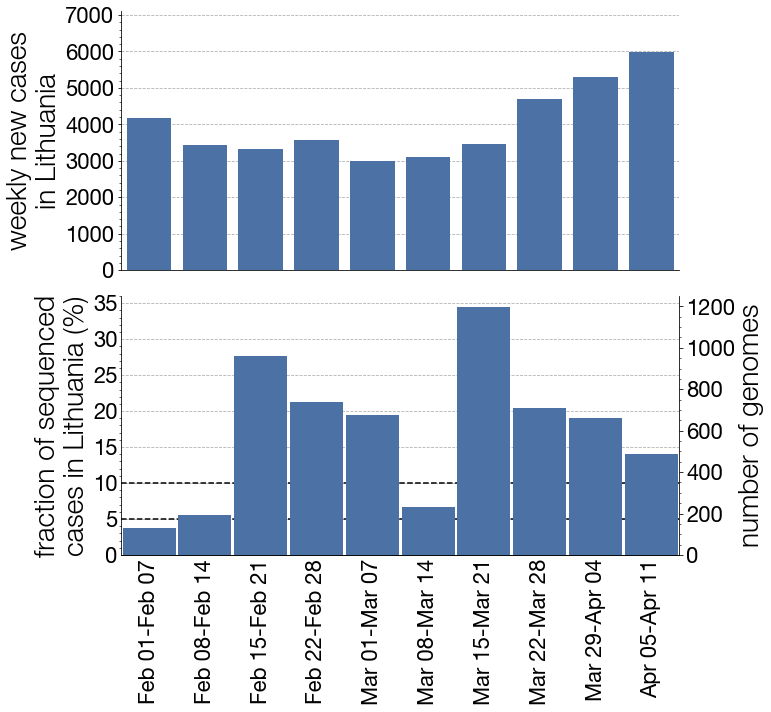

In [2]:
fig = plt.subplots(figsize=(10,10),facecolor='w')

gs = GridSpec(2, 1,hspace=0.1,wspace=0.1,height_ratios=[1,1])
ax = plt.subplot(gs[1])

# ax.plot(smoothed_xs,smoothed_ys)
# ax.plot(smoothed_xs,smoothed_gs)
xs=sorted(timeline.keys())
print(xs)
cs=[timeline[t]['cases'] for t in xs]
gens=[timeline[t]['genomes'] for t in xs]
print(sum(gens))
print(gens)

print(sum(gens)/sum(cs))
ys=[timeline[t]['genomes']/timeline[t]['cases']*100 if timeline[t]['cases']>0 else np.nan for t in xs]
# print(xs)
# ax.plot(list(map(bt.decimalDate,smoothed_xs)),[g/c for g,c in zip(smoothed_gs,smoothed_ys)],lw=3,color='k')

ax.bar(range(len(cs)),ys,facecolor='#4C72A5',edgecolor='none',width=0.95,zorder=100)

ax.axhline(5,ls='--',color='k')
ax.axhline(10,ls='--',color='k')

# ax.set_xticklabels([])
# pretty_x_axis(ax,calendar_timeline)

# ax.set_xlim(bt.decimalDate('2021-01-25'),bt.decimalDate('2021-04-01'))

months={'Jan': 'Sau', 'Feb': 'Vas', 'Mar': 'Kov', 
        'Apr': 'Bal', 'May': 'Geg', 'Jun': 'Bir', 
        'Jul': 'Lie', 'Aug': 'Rgp', 'Sep': 'Rgs', 
        'Oct': 'Spa', 'Nov': 'Lap', 'Dec': 'Gru'} ## translate months to Lithuanian

fmt_x=[] ## format x ticks
for t in sorted(timeline.keys()): ## iterate over weeks
#     lt_mon=months[dt.strftime(t[0],'%b')] ## translate month to Lituanian
#     s='%s %s'%(lt_mon,dt.strftime(t[0],'%d')) ## beginning of the week
    
#     lt_mon=months[dt.strftime(t[1],'%b')]
#     e='%s %s'%(lt_mon,dt.strftime(t[1],'%d')) ## end of the week
    
    s='%s'%(dt.strftime(t[0],'%b %d')) ## beginning of the week
    e='%s'%(dt.strftime(t[1],'%b %d')) ## end of the week
    
    fmt_x.append('%s-%s'%(s,e)) ## format week slice, add to x tick labels
#     fmt_x.append('%s'%(dt.strftime(t[0],'%b')))
    
ax.set_xticks(range(len(timeline))) ## set timeline as x axis
ax.set_xticklabels(fmt_x,rotation=90)

skip_weeks=3

ax.grid(axis='y',ls='--',zorder=0)
ax.set_xlim(min([i for i,y in enumerate(ys) if y>0])-0.5,len(ys)-0.5-skip_weeks)

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['left','bottom']]



ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.set_ylim(0,36)


ax.tick_params(size=0)
# ax.set_ylabel('sekvenuotų atvejų procentas',size=22)
ax.set_ylabel('fraction of sequenced\ncases in Lithuania (%)',size=28)


#######
ax3=ax.twinx()

ax3.yaxis.tick_right()
ax3.set_ylabel('number of genomes',size=28)
[ax3.spines[loc].set_visible(False) for loc in ax3.spines if loc not in ['right','bottom']]
ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax3.set_ylim(*[max(gens)/max(ys)*y for y in ax.get_ylim()])
#######


ax2 = plt.subplot(gs[0])


# ax2.plot(range(len(cs)),cs,color='#4C72A5',lw=4)
# ax2.scatter(range(len(cs)),cs,s=100,facecolor='#4C72A5',edgecolor='none')
ax2.bar(range(len(cs)),cs,facecolor='#4C72A5',edgecolor='none',zorder=100)

ax2.grid(axis='y',ls='--',zorder=0)

ax2.set_xticks([])
ax2.set_xticklabels([])


ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(200))

# ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))
# ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1000))


ax2.set_ylabel('weekly new cases\nin Lithuania',size=28)

[ax2.spines[loc].set_visible(False) for loc in ax2.spines if loc not in ['left','bottom']]

ax2.set_xlim(min([i for i,y in enumerate(ys) if y>0])-0.5,len(ys)-0.5-skip_weeks)
ax2.set_ylim(0,7100)
# ax2.set_ylim(0,20000)

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/SuppFig2_sequencing.png',dpi=100,bbox_inches='tight')

plt.show()

In [3]:
print(max(gens),max(ys),max(gens)/max(ys)*36)
print(ax.get_ylim())
print([max(gens)/max(ys)*y for y in ax.get_ylim()])

1199 34.53341013824885 1249.92
(0.0, 36.0)
[0.0, 1249.92]


In [4]:
from statsmodels.stats.proportion import proportion_confint

print(gens)

for s in gens:
    print(s,proportion_confint(1,s,method='jeffrys'))
# print(timeline)
# print(xs)
# print(cs,gens)

[158, 191, 922, 759, 582, 209, 1199, 961, 1009, 838, 111, 0, 0]
158 (0.0006837463409777075, 0.02919593442738233)
191 (0.0005654903903765366, 0.024206638869745722)
922 (0.00011705053794364384, 0.005058173224969265)
759 (0.00014219437244597448, 0.006141463006762882)
582 (0.00018545363698784767, 0.008002537302786439)
209 (0.0005167420157126973, 0.0221426345472322)
1199 (9.000441266867969e-05, 0.0038916381445417425)
961 (0.0001122993381548661, 0.004853344370950086)
1009 (0.0001069560117164889, 0.0046229391505066)
838 (0.00012878627472084333, 0.005563935808332254)
111 (0.0009737749569281733, 0.041327243759980536)
0 (nan, nan)
0 (nan, nan)


/Users/evogytis/opt/miniconda3/lib/python3.8/site-packages/statsmodels/stats/proportion.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  q_ = count * 1. / nobs
